
# Introduction



1. **Linear Models**: Logistic Regression   

2. **Tree-Based Models**:  Decision Trees & Random Forests

3. **Support Vector Classifier**: SVC 





My ultimate aim is to offer you a thorough and practical resource packed with strategies and insights, ready to be adapted for your own projects (just click "Edit Notebook" to customize my code for your needs). I hope this notebook equips you with the confidence and expertise to tackle your own classification challenges effectively.




The dataset includes data for Portuguese red and white "Vinho Verde" wines, with variables based on physicochemical properties and sensory quality scores. This dataset can be used for classification or regression tasks, though the classes are imbalanced.



**Content**:

- **Input Variables**: Various physicochemical properties of the wine (e.g., acidity, sugar, density).

- **Output Variable**: Quality score (0-10) based on sensory data.



**Tips for Use**:

- Try setting an arbitrary quality threshold (e.g., score ≥ 7 as "good") for classification.

- Experiment with hyperparameter tuning for decision tree algorithms and evaluate using AUC and ROC curves.



**Acknowledgements**:

This dataset is publicly available at the UCI Machine Learning Repository and should be cited appropriately when used.



**Publication**: 

*Cortez, P., Cerdeira, A., Almeida, F., Matos, T., Reis, J., Decision Support Systems, 47(4):547-553, 2009*.



# PreProcessing & Visualization


In [ ]:

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes = True)   
sns.set_palette(palette = 'gist_heat', n_colors = 8)
sns.set(style="whitegrid")

In [ ]:
data = pd.read_csv('winequality-red.csv')

df_main_2 = pd.DataFrame(data)

df_main_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_main_2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df_main_2.shape

(1599, 12)

There are 12 columns & 1599 rows in this dataset.

In [ ]:
df_main_2.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_main_2['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
df_main_2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div style="border-radius:10px; padding: 15px;

            ; font-size:110%; text-align:left">



- we can see statistical information on the table above.

In [13]:
# finding unique data

df_main_2.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [14]:
unique = df_main_2.nunique().sort_values()

unique_values = df_main_2.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
alcohol,65,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3..."
chlorides,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0..."
citric acid,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29..."
density,436,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,..."
fixed acidity,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,..."
free sulfur dioxide,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0..."
pH,89,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,..."
quality,6,"[5, 6, 7, 4, 8, 3]"
residual sugar,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ..."
sulphates,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8..."


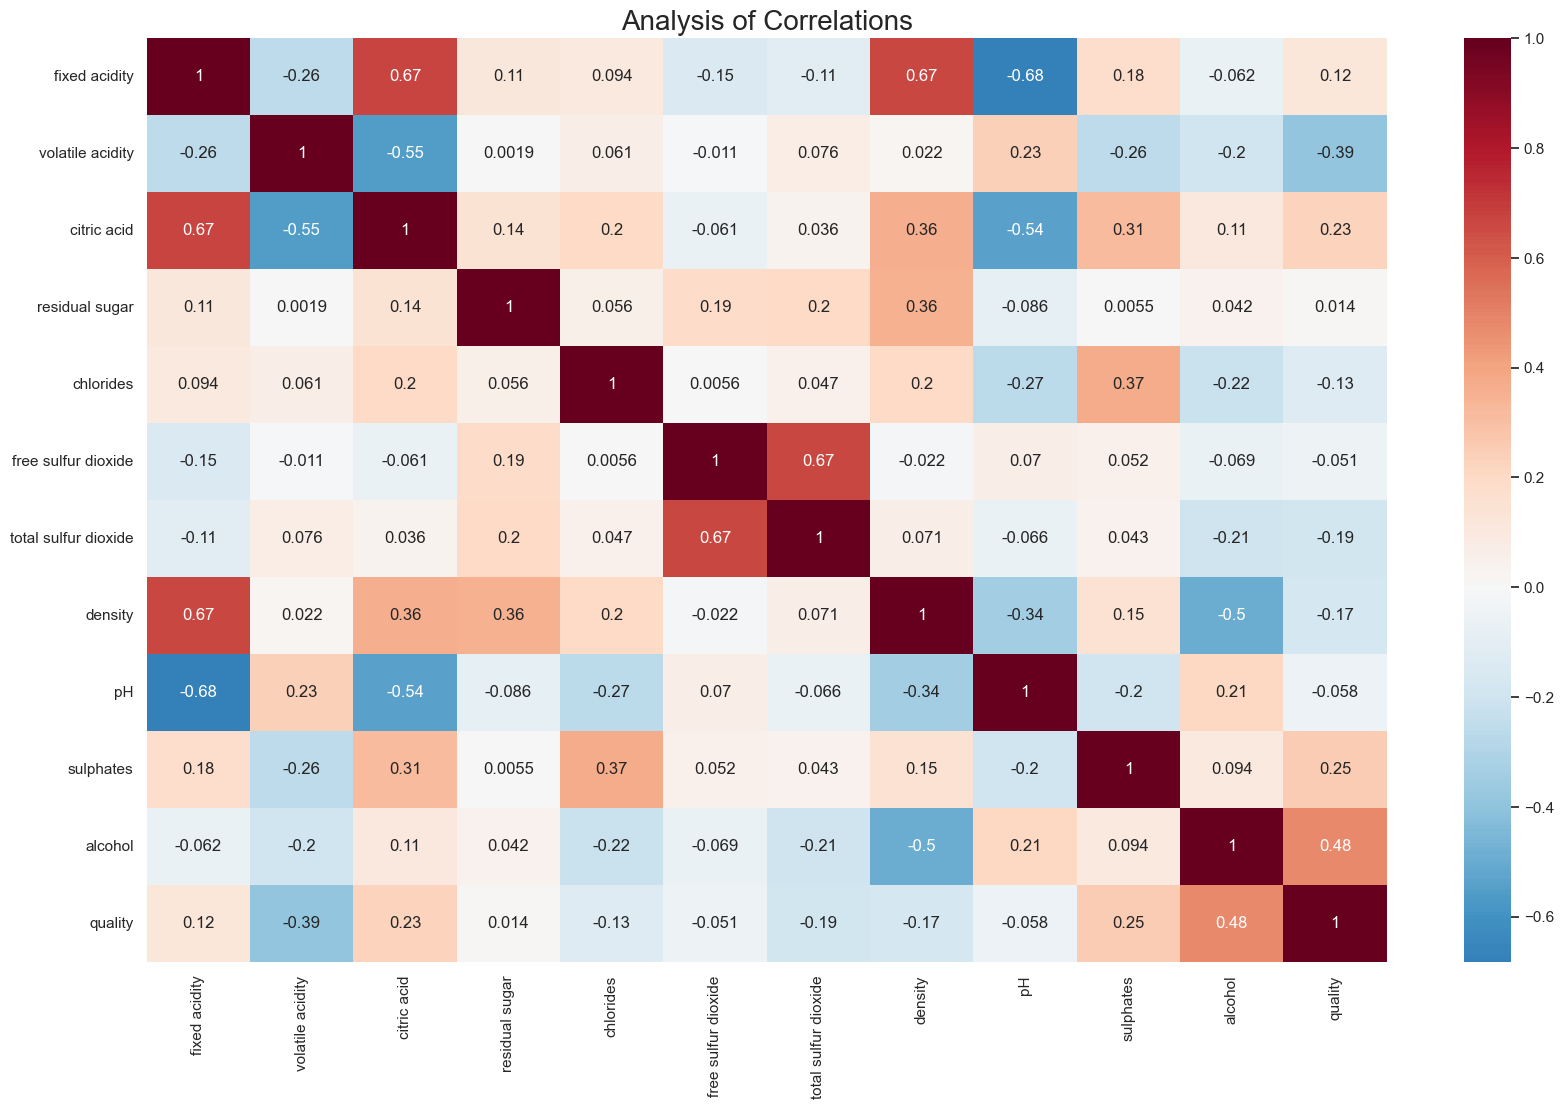

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_main_2.corr(numeric_only=True), annot=True, cmap="RdBu_r", center=0)
plt.title('Analysis of Correlations', size=20)
plt.show()

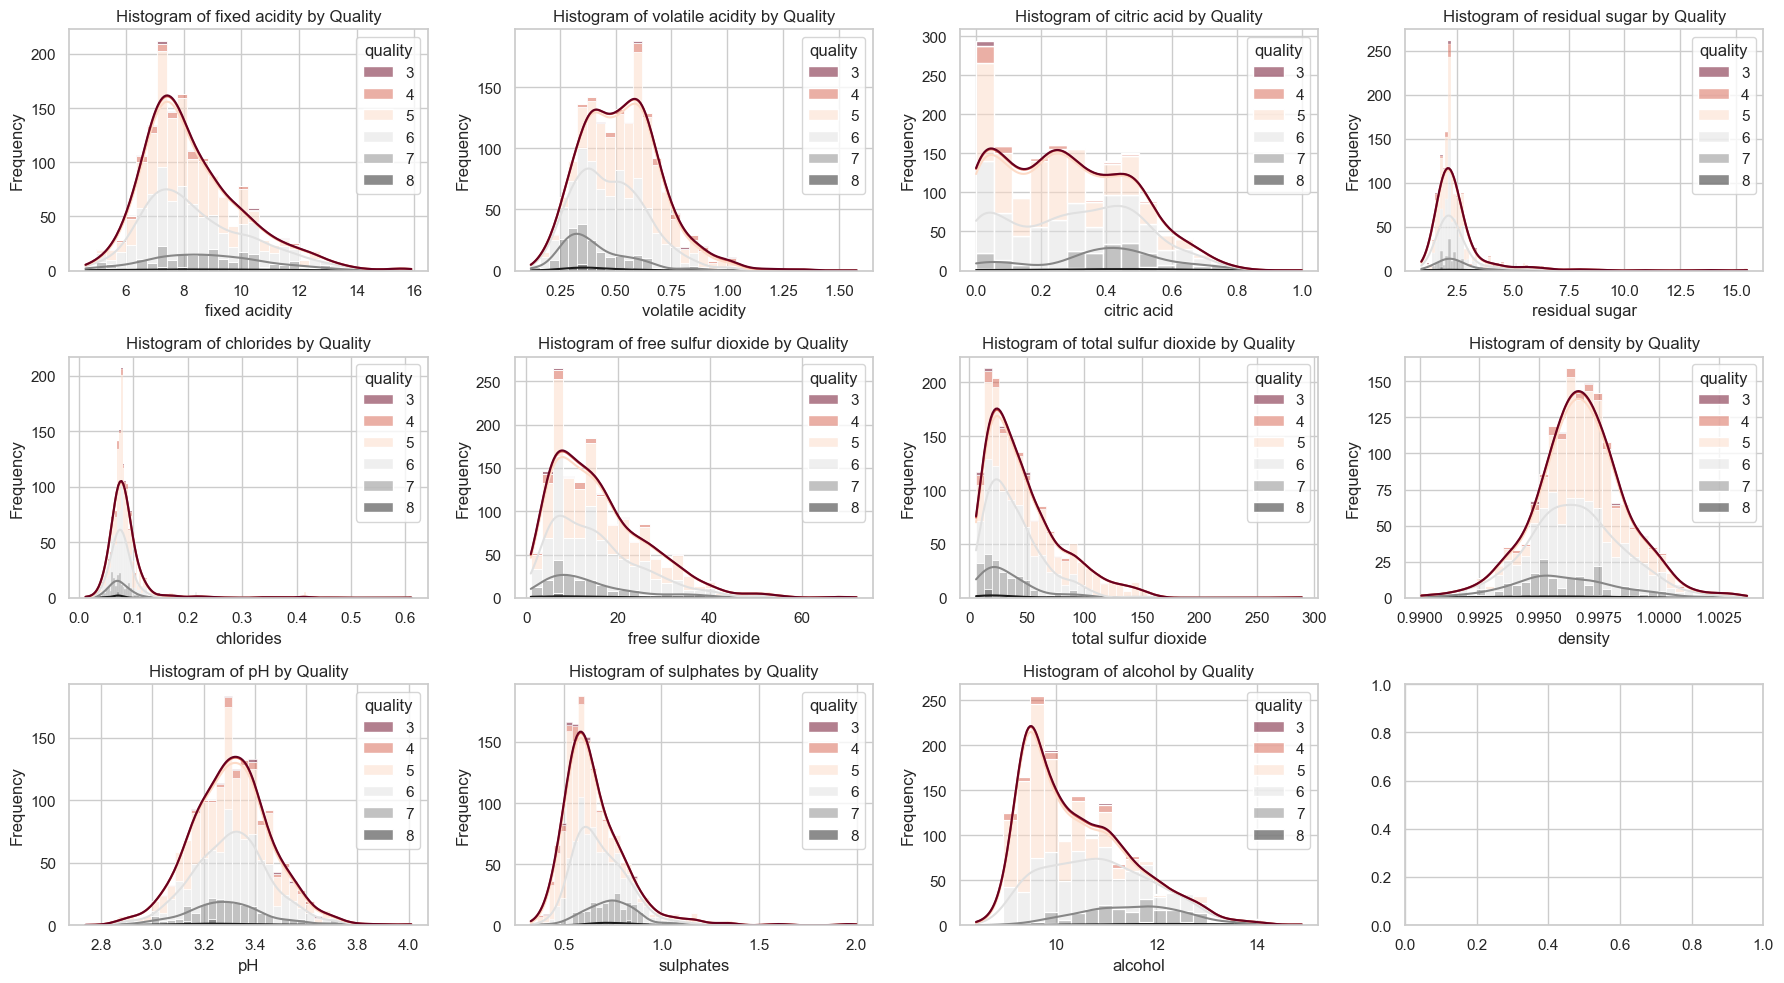

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
ff = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol', 'quality']

for i, column in enumerate(ff[:-1]):  
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df_main_2, x=column, hue='quality', kde=True, ax=ax, palette='RdGy', multiple="stack")
    ax.set_title(f'Histogram of {column} by Quality')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<a id="ml"></a>

<h1 style="
    background-image: url('https://papers.co/wallpaper/papers.co-se98-red-wine-gradation-blur-29-wallpaper.jpg'); 
    background-size: cover;
    background-position: center;
    font-family: 'Times New Roman', serif;
    font-size: 1.5em;
    color: white;
    text-align: center;
    padding: 15px;
    border-radius: 15px 50px;
    border: 1px solid black;
">
    Classification Models
</h1>


In [21]:
data = data.replace({'quality' : {

                                    8 : 'Good',

                                    7 : 'Good',

                                    6 : 'Middle',

                                    5 : 'Middle',

                                    4 : 'Bad',

                                    3 : 'Bad',}})

In [24]:
data['quality'].value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


In [26]:
labelencoder_y = LabelEncoder()
data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [27]:
train_columns = data.columns[:-1]
train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [28]:
X = data.drop('quality', axis = 1).values
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [29]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [40]:
# Initialize lists to store algorithm names, accuracies, and model details

al = []
accuracy = []
models = []



# Function to evaluate the performance of a model
def evaluate_model(algorithm_name, model): 
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    # Calculate accuracy scores
    acc_model = model.score(X_test, y_test)
    train_acc_model = model.score(X_train, y_train)

    # Store the algorithm name and accuracy
    al.append(algorithm_name)
    accuracy.append(acc_model)
    

    # Print performance metrics
    print(f'For {algorithm_name}\n') 
    print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')
    print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.4f} %\n')


    # Create subplots for the confusion matrix and ROC curve
    plt.figure(figsize=(8, 6))

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                cmap='RdGy', annot_kws={'size': 15}, 
                square=True, fmt='.0f'
                )
    plt.title(f'Confusion Matrix for {algorithm_name}', fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    
    

    # Extract confusion matrix values (True Positive, False Positive, etc.)

    tp = confusion_matrix(y_test, y_pred)[0, 0]
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    tn = confusion_matrix(y_test, y_pred)[1, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]

    # Append the model evaluation results to the models list
    models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

### Logistic Regression



Logistic regression is a widely used linear classification technique that predicts the probability of an event occurring by fitting data to a logistic curve. It’s particularly suited for binary classification tasks, where the outcome is a probability between 0 and 1. This method works by establishing a relationship between the features (independent variables) and the target (dependent variable), using a sigmoid function to output probabilities.



#### **Advantages of Logistic Regression:**



1. **Simplicity**: 

   - Logistic regression is straightforward to implement and understand. Unlike more complex models, it provides a direct and intuitive way to classify data, making it ideal for beginners in machine learning.

   

2. **Efficiency**: 

   - This algorithm is computationally efficient and works well with large datasets. Since it only requires fitting a simple equation, logistic regression tends to scale better with data size compared to more complex models like decision trees or neural networks.



3. **Interpretability**: 

   - One of the standout benefits of logistic regression is the interpretability of its coefficients. The coefficients in the model indicate how much each feature contributes to the prediction, which is particularly useful for understanding feature importance in fields such as healthcare, finance, and social sciences.



#### **Disadvantages of Logistic Regression:**



1. **Linearity Assumption**: 

   - Logistic regression assumes that the relationship between the independent variables and the log-odds of the dependent variable is linear. However, real-world data often exhibit non-linear relationships. In such cases, the model might fail to capture the true complexity of the data, leading to poor performance.



2. **Limited Expressiveness**: 

   - Although logistic regression is a powerful method for linearly separable data, it may struggle to model complex, non-linear relationships. In scenarios where the decision boundary is not a straight line, more advanced models like decision trees or support vector machines may outperform logistic regression.



3. **Overfitting Risk**: 

   - Logistic regression can easily overfit, especially when dealing with a large number of features or small datasets. Overfitting occurs when the model learns the noise in the training data rather than the underlying patterns, resulting in poor generalization to unseen data.



   - To mitigate overfitting, it is essential to apply regularization techniques such as L1 or L2 regularization, which penalize large coefficients and help the model generalize better.



4. **Sensitivity to Outliers**:

   - Logistic regression can be sensitive to outliers in the data, as they can disproportionately affect the model’s predictions. However, applying strong regularization (e.g., L1 or L2) can reduce the influence of outliers by constraining the model’s complexity.



#### **Key Hyperparameters of Logistic Regression:**



1. **Penalty (Regularization)**:

   - This hyperparameter determines the type of regularization applied to the model. The two main types are **L1 (Lasso)** and **L2 (Ridge)** regularization. L1 regularization can help with feature selection by driving some coefficients to zero, while L2 regularization helps prevent overfitting by penalizing large coefficients.



2. **C (Inverse of Regularization Strength)**:

   - The `C` parameter controls the strength of regularization. A small value of `C` implies strong regularization, while a larger value means weaker regularization. The optimal value of `C` balances fitting the model well to the data while avoiding overfitting.



3. **Solver**:

   - The solver determines which optimization algorithm is used to minimize the loss function. Different solvers are suitable for different dataset sizes and regularization methods. Common solvers include **‘liblinear’**, **‘newton-cg’**, and **‘saga’**. The choice of solver can impact both model performance and computational efficiency.



4. **Max_iter (Maximum Number of Iterations)**:

   - This hyperparameter sets the maximum number of iterations the solver will take to converge. If the model does not converge before reaching this limit, it may indicate that the data is not linearly separable or that the regularization needs adjustment.







Logistic regression is a powerful yet simple algorithm for binary classification tasks. While it has its limitations, especially with complex, non-linear data, it remains a go-to tool for many applications due to its efficiency, interpretability, and ease of implementation. The use of regularization and careful tuning of hyperparameters can significantly improve its performance and robustness.

For Logistic Regression

Training Accuracy: 84.5192 %

Testing Accuracy: 85.0000 %

Accuracy Score: 85.0000 %



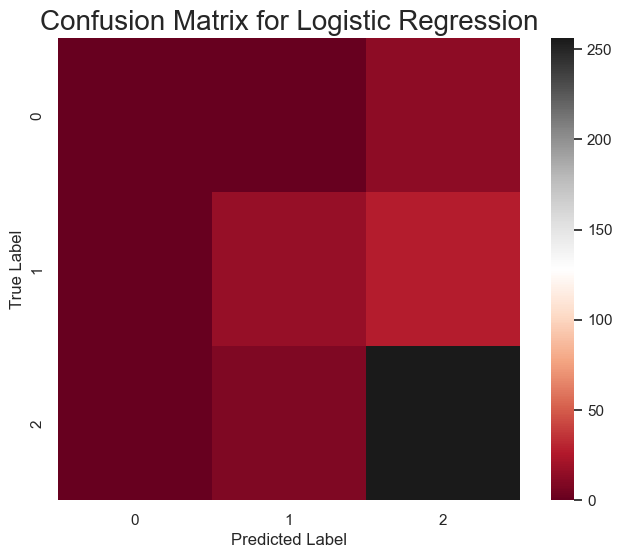

In [41]:
evaluate_model('Logistic Regression',

                           LogisticRegression(C=1.2, fit_intercept=True, 

                                              max_iter=50, penalty = 'l1', solver='saga'))

Tree-based algorithms are a class of machine learning models that rely on decision trees to make predictions. These models work by navigating through a series of if-else conditions based on the input features, making decisions at each step to ultimately reach a prediction.



### **Decision Tree**



A decision tree is one of the simplest and most intuitive models for both classification and regression tasks. It operates by recursively partitioning the feature space into smaller regions, where each region corresponds to a prediction for the target variable. In classification tasks, the prediction is typically the majority class of the training data in that region, while in regression tasks, it is the average target value for that region. Decision trees are flexible and easy to interpret, making them a popular choice for beginners in machine learning.



### **Random Forest:**



Random Forest is an ensemble learning method, meaning it combines the predictions of multiple models to improve overall performance. In this case, Random Forest uses many decision trees to form a "forest" of trees. Each tree in the forest is trained on a random subset of both the training data and features, which helps to reduce overfitting and improve the robustness of the model. The final prediction is made by aggregating the predictions of all individual trees, typically through voting (for classification) or averaging (for regression). This ensemble approach helps to create a more stable and accurate model.





### **Decision Trees:**



**Advantages:**



1. **Intuitive and Interpretable**: Decision trees are simple to understand and can be visualized, making them accessible even to non-experts. This makes it easy to explain how decisions are made by the model.

   

2. **Handles Non-linearity**: Decision trees are capable of capturing non-linear relationships between input features and the target variable. Unlike linear models, decision trees do not assume a specific functional form for the data, which gives them more flexibility in modeling complex patterns.



3. **No Assumptions about Data**: One of the key advantages of decision trees is that they make no assumptions about the distribution or structure of the data. This makes them versatile and suitable for a wide range of problems, even when the data does not follow a standard distribution.



**Disadvantages:**



1. **Overfitting**: One of the most significant drawbacks of decision trees is their tendency to overfit. This means that they can become overly complex and memorize the training data, leading to poor generalization to unseen data. This is especially problematic when the data is noisy or has many irrelevant features.



2. **Instability**: Decision trees are sensitive to small changes in the data. A slight variation in the training set can lead to a completely different tree being generated. This makes them less robust compared to other algorithms like ensemble methods.



3. **Bias towards Dominant Classes**: In cases where the dataset is imbalanced, decision trees may be biased towards predicting the majority class, as they will try to minimize the error by focusing on the most common class in the dataset.



4. **Sensitivity to Outliers**: Decision trees can be influenced by outliers in the data, which may cause them to make poor decisions in certain regions. However, methods like pruning (removing branches that have little importance) and ensemble techniques like Random Forests can help mitigate this issue by providing more robust predictions.





### **Important Hyperparameters in Decision Trees:**



1. **Criterion**: This parameter defines the function used to evaluate the quality of a split. The two most common criteria are:

   - **Gini Impurity**: Measures the "impurity" of a split by calculating the likelihood that a randomly chosen sample would be incorrectly classified.

   - **Entropy**: Measures the "information gain" of a split by looking at how much uncertainty is reduced after the split.



2. **Max_depth**: The maximum depth of the tree, which limits how deep the tree can grow. Deeper trees can capture more complex relationships but are more prone to overfitting. Shallow trees may underfit, missing important patterns in the data.



3. **Max_leaf_nodes**: This parameter restricts the maximum number of leaf nodes in the tree. By limiting the number of leaves, you can prevent the model from becoming too complex and overfitting the training data. It helps to simplify the model and improve generalization.



4. **Max_features**: This specifies the number of features to consider when looking for the best split at each node. Limiting the number of features can reduce the model's complexity and help prevent overfitting, especially in cases where there are many features in the dataset.





Tree-based algorithms, particularly decision trees and Random Forests, are powerful tools in machine learning. Decision trees offer a simple and intuitive way to make predictions, while Random Forests improve on this by combining multiple trees to create a more robust and accurate model. However, decision trees have some inherent limitations, such as overfitting and instability, which can be addressed by using techniques like pruning, setting hyperparameters, or adopting ensemble methods like Random Forests. These models are particularly useful when you need to capture non-linear relationships without making strong assumptions about the data distribution.

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Accuracy Score: 80.3125 %



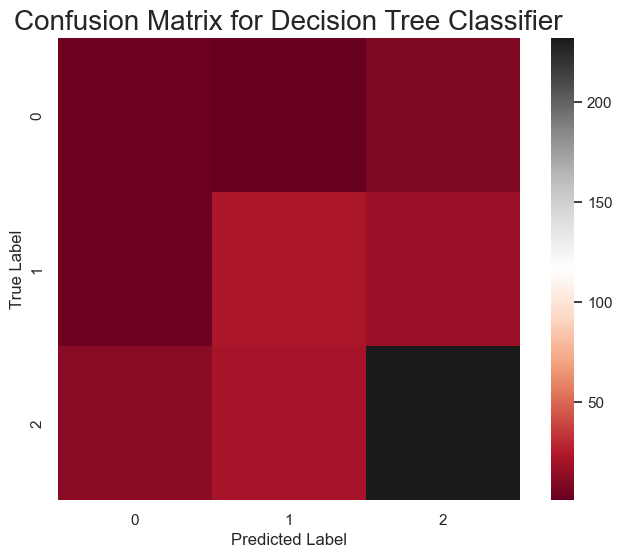

In [42]:
evaluate_model('Decision Tree Classifier',

               DecisionTreeClassifier(criterion = 'entropy',

                                      splitter = 'best', 

                                      max_features=6, max_depth = 20,

                                      max_leaf_nodes=200, random_state = 33))

### **Support Vector Classifier (SVC)**



The **Support Vector Classifier (SVC)** is a powerful and widely-used supervised learning algorithm primarily designed for classification tasks. It aims to find the optimal hyperplane that best separates the different classes in the feature space, which can be a highly complex decision boundary, especially in higher-dimensional spaces.



#### **How It Works:**



At its core, the SVC tries to find a hyperplane (or decision boundary) that maximizes the margin between the different classes. The margin refers to the distance between the nearest data points of each class to the hyperplane. By maximizing this margin, the SVC achieves better generalization and minimizes classification errors on unseen data.



### **Advantages of SVC:**



1. **Effective in High-Dimensional Spaces:**

   - One of the key strengths of the SVC is its ability to work well in high-dimensional feature spaces. This makes it particularly useful when dealing with datasets that contain many features (such as text classification tasks where features can be tens of thousands of words).

   

2. **Versatile Kernel Functions:**

   - SVC can use various kernel functions, such as:

     - **Linear kernel**: Suitable for linearly separable data.

     - **Polynomial kernel**: Effective for data that is not linearly separable but follows a polynomial relationship.

     - **Radial Basis Function (RBF) kernel**: Well-suited for highly non-linear decision boundaries by mapping data into higher dimensions, where a linear separation is possible.

   - This flexibility allows SVC to handle a wide variety of datasets and relationships between features.



3. **Robust to Overfitting:**

   - By maximizing the margin between classes, SVC tends to have a lower risk of overfitting. Overfitting happens when a model learns too much from the training data and performs poorly on new, unseen data. Maximizing the margin allows SVC to generalize well to new data points.



4. **Works for Both Linear and Non-Linear Classification:**

   - Using the appropriate kernel function, SVC can efficiently handle both **linear** and **non-linear** classification tasks. The choice of kernel allows the model to adapt to different types of decision boundaries that may exist in the feature space.



### **Disadvantages of SVC:**



1. **Hyperparameter Sensitivity:**

   - SVC performance is highly sensitive to the values of its hyperparameters, notably the **regularization parameter (C)** and **kernel parameters**. The regularization parameter controls the trade-off between maximizing the margin and minimizing classification errors, while the kernel parameters (such as gamma for the RBF kernel) control how complex the decision boundary can be. Tuning these parameters often requires extensive experimentation or cross-validation, which can be time-consuming.



2. **Computationally Intensive:**

   - Training an SVC can be computationally expensive, particularly with large datasets. This is because it involves solving a **quadratic optimization problem**, which requires significant computational resources, especially for datasets with a large number of samples and features.



3. **Poor Performance with Noisy Data:**

   - SVCs are sensitive to noise and outliers in the data. Noise can lead to small margins or inappropriate decision boundaries, especially in high-dimensional spaces, negatively affecting model performance. If the dataset contains a significant amount of noise, the classifier may fail to generalize well and produce poor predictions.



### **Important Hyperparameters for SVC:**



1. **C (Regularization Parameter):**

   - The **C** parameter controls the trade-off between achieving a **large margin** and having **low classification error**. A smaller value of C allows for a larger margin but might allow more misclassifications, while a larger value of C penalizes misclassifications more heavily, leading to a smaller margin but fewer errors.

   

2. **Kernel Function:**

   - The kernel function defines the type of decision boundary. Commonly used kernels include:

     - **Linear kernel**: Assumes a linear separation between classes.

     - **Polynomial kernel**: Suitable for non-linear relationships, where the decision boundary is a polynomial.

     - **Radial Basis Function (RBF) kernel**: Maps data into higher dimensions, allowing for highly non-linear decision boundaries.



3. **Gamma (Kernel Coefficient):**

   - The **gamma** parameter defines how much influence each training sample has on the decision boundary. A small gamma means that the influence of each data point is more spread out, leading to smoother decision boundaries. A larger gamma means that each data point has a more localized influence, leading to more complex decision boundaries. Selecting the appropriate gamma is critical for ensuring a good decision boundary.





The **Support Vector Classifier (SVC)** is a powerful and flexible model that excels in high-dimensional spaces and offers robust performance with appropriate tuning. However, it requires careful parameter selection and can be computationally expensive, especially when dealing with large datasets or noisy data. When tuned properly, SVC can effectively classify both linear and non-linear data, making it suitable for a wide range of real-world classification problems.

For Support Vector Classifier

Training Accuracy: 86.0829 %

Testing Accuracy: 86.8750 %

Accuracy Score: 86.8750 %



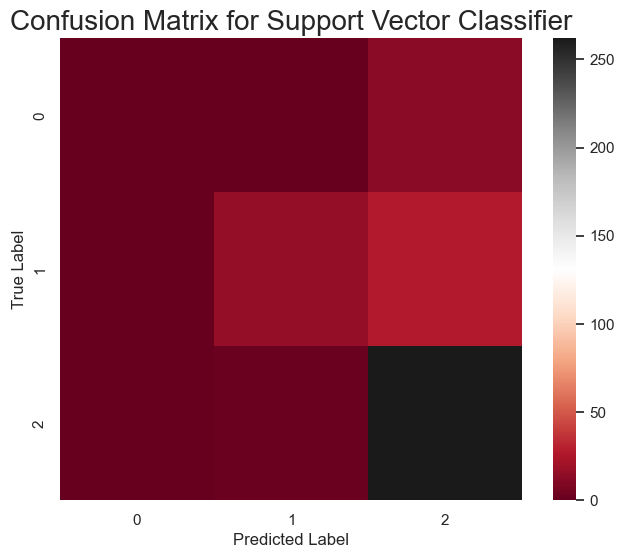

In [43]:
evaluate_model('Support Vector Classifier', SVC( C = 1, gamma = 'auto',

                                                kernel = 'rbf', random_state = 33, probability=True))

The **Random Forest Classifier** demonstrated the **highest accuracy** among all the evaluated models, indicating its strong performance in correctly predicting the target variable overall. This result highlights its reliability as an ensemble learning method, leveraging multiple decision trees to enhance predictive power and reduce overfitting.



On the other hand, the **Decision Tree Classifier**, while recording the **lowest accuracy** compared to other models, showed an interesting characteristic—it achieved the **highest number of correct predictions after the Gradient Bossting Classifier**. This might seem contradictory at first, but it suggests that although AdaBoost had a lower percentage of overall correct predictions (accuracy), it succeeded in identifying a larger number of true positives or key instances that contributed more significantly to the practical outcome of the task.



This finding is essential for understanding model behavior beyond basic accuracy metrics. AdaBoost’s performance implies that despite its overall accuracy, it can be highly effective for imbalanced datasets or scenarios where correctly identifying specific cases is more valuable than a high general accuracy rate. The outcome highlights the importance of considering multiple evaluations, such as **Confusion Matrix**, to fully understand a model’s utility in various contexts.